# Исследование успешности компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и кампания планируется на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План проекта**

1. Открыть и изучить данные
2. Провести предобработку датасета
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы

## 1. Обзор данных

Сначала импортируем данные и все необходимые библиотеки, изучим информацию о данных.

In [1]:
import pandas as pd
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Перед нами данные об играх, выпущенных в разные годы, каждое значение в таблице - определенная игра, каждый столбец - характеристики данной игры. Нам даны следующие характеристики:

* `Name` - название игры
* `Platform` - платформа, на которой выпускалась игра
* `Year_of_Release` - год выпуска
* `Genre` - жанр
* `NA_sales` - продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` - продажи в Европе (миллионы проданных копий)
* `JP_sales` - продажи в Японии (миллионы проданных копий)
* `Other_sales` - продажи в других странах (миллионы проданных копий)
* `Critic_Score` - оценка критиков (максимум 100)
* `User_Score` - оценка пользователей (максимум 10)
* `Rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# 2. Предобработка данных

В данных найдены следующие проблемы:
* названия столбцов с заглавной буквы
* пропуски
* неверный тип данных в столбцах

### Замена типа данных

Приведем названия столбцов в нижний регистр и сократим для удобства.

In [3]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
df.set_axis(['name', 'platform', 'year', 'genre',
             'na', 'eu', 'jp', 'other_sales',
             'critic_score', 'user_score', 'rating'],
           axis=1, inplace=True)
df.columns

Index(['name', 'platform', 'year', 'genre', 'na', 'eu', 'jp', 'other_sales',
       'critic_score', 'user_score', 'rating'],
      dtype='object')

В столбце `year` заменим тип данных на целочисленный, а в столбце `user_score` приведем значения к числовому типу.

In [5]:
df['year'] = df['year'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na            16715 non-null  float64
 5   eu            16715 non-null  float64
 6   jp            16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

In [6]:
df.isna().sum()

name               2
platform           0
year             269
genre              2
na                 0
eu                 0
jp                 0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

In [7]:
# посмотрим на пропуски в названии игр
df[df['name'].isna()]

,name,platform,year,genre,na,eu,jp,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


1. Пропуски в столбце имени и жанра - совпадают, их всего 2 и если они не являются единственными на своей платформе и в 1993 году,их можно удалить.

In [8]:
df[df['platform'] == 'GEN']
df[df['year'] == 1993].head()

,name,platform,year,genre,na,eu,jp,other_sales,critic_score,user_score,rating
56,Super Mario All-Stars,SNES,1993,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN
476,Star Fox,SNES,1993,Shooter,1.61,0.51,0.80,0.07,NaN,NaN,NaN
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
852,Super Street Fighter II,SNES,1993,Fighting,0.52,0.16,1.29,0.03,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993,Fighting,1.48,0.39,0.00,0.06,NaN,NaN,NaN


Так как это не единственные игры в 1993 году и на платформе GEN мы можем их исключить из анализа.

In [9]:
df.dropna(subset=['name'], inplace=True)
df.isna().sum()

name               0
platform           0
year             269
genre              0
na                 0
eu                 0
jp                 0
other_sales        0
critic_score    8576
user_score      9123
rating          6764
dtype: int64

2. Пропуски в оценках заменим на аномальное значение, а пропуски в рейтинге, на строковое значение Unknown

In [10]:
df['user_score'] = df['user_score'].fillna(-3)
df['critic_score'] = df['critic_score'].fillna(-3)
df['rating'] = df['rating'].fillna('Unknown')
df.isna().sum()

name              0
platform          0
year            269
genre             0
na                0
eu                0
jp                0
other_sales       0
critic_score      0
user_score        0
rating            0
dtype: int64

### Дубликаты

In [11]:
df.duplicated().sum()

0

### Добавим столбец с сумарной продажей во всех регионах

In [12]:
df['total_sale'] = df['na'] + df['eu'] + df['jp'] + df['other_sales']

# 3. Исследовательский анализ данных

### Найдем актуальный период для данных

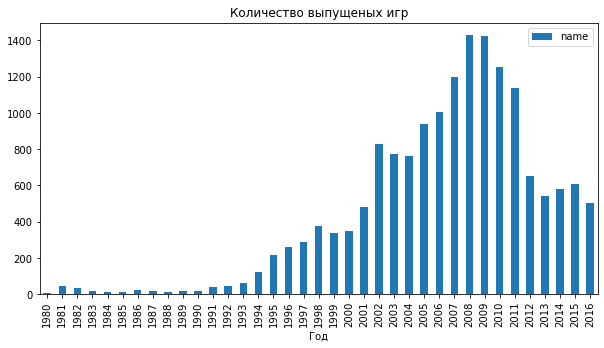

In [15]:
# построим гистограмму по годам и количеству выпущенных игр 
year_release = df.pivot_table(index='year', values='name', aggfunc='count')
year_release.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Год')
plt.title('Количество выпущеных игр')
plt.show()

До 1995 года игр выпускалось меньше 200 в год - этот период можно исключить из анализа.

In [21]:
# отфильтруем самые популярные платформы
top_10 = df.groupby('platform')['name'].count().sort_values(ascending=False).head(10)
top_10_table = df[df['platform'].isin(top_10.index)]

# построим график актуальных платформ
top_10_pivot = top_10_table.pivot_table(index='year',columns='platform', values='name', aggfunc='count')
fig = px.line(top_10_pivot)
fig.show()

In [22]:
# найдем среднюю продолжительность жизни платформы через функцию
def life_long_platform (meaning):
    life = top_10_table[top_10_table['platform'] == meaning]
    life_long = life['year'].max() - life['year'].min()
    return life_long

mean_life_long = top_10_table['platform'].apply(life_long_platform)
mean_life_long.mean()

14.414232888083918

Средняя продолжительность жизни платформы - порядка 14-ти лет. Оценим срок жизни платформы по взлету и падению суммарных продаж по годам.

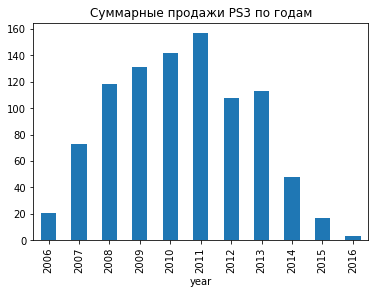

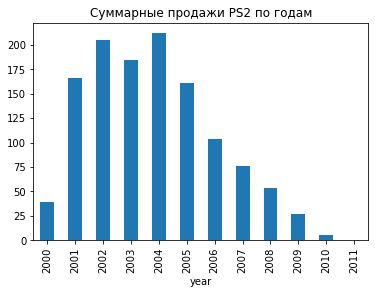

In [23]:
df.query('platform == "PS3"').groupby('year')['total_sale'].sum().plot(kind = 'bar')
plt.title('Суммарные продажи PS3 по годам')
plt.show()

df.query('platform == "PS2"').groupby('year')['total_sale'].sum().plot(kind = 'bar')
plt.title('Суммарные продажи PS2 по годам')
plt.show()

До 2002 года игр выпускалось значительно меньше, а средняя продолжительность жизни популярной платформы - 10 лет - соответственно игры, которые выпускались на платформах до 2006 года - уже устарели. В такой динамично меняющейся индустрии, как компьютерные игры можно взять актуальные данные за 2-3 года

In [24]:
# создадим новую таблицу с актуальным периодом
actual_table = df[df['year'] >= 2013]

In [25]:
# построим график актуального периода
pivot = actual_table.pivot_table(index='year',columns='platform', values='name', aggfunc='count')
fig = px.line(pivot)
fig.show()

Актуальный период для прогнозирования успеха платформы - 2013 - 2016 годы, за это время мы можем отследить тренды в игровой индустрии.

### Определим потенциально прибыльные платформы.

In [26]:
# построим график продаж игр на платформах по годам
pivot = actual_table.pivot_table(index='year',columns='platform', values='total_sale', aggfunc='sum')
fig = px.line(pivot)
fig.show()

Исходя из графика и продолжительности жизни популярной платформы (10 лет) можно сделать следующие выводы:
* `PS2`,`DS`,`Wii`, `X360`, `PS3` - были одними из самых успешных платфом, но устаревают и заканчивают свое существование.
* `PSP`, `PC` - были менее популярными платформами и также устаревают.
* `GBA`, `XB`, `GC` - давно исчезнувшие платформы.
* Платформы, которые только начинают свой путь от создателей платформ, которые уже были успешны и которые можно считать перспективными: `3DS`, `PSV`, `WiiU`, `PS4`, `XOne`, 

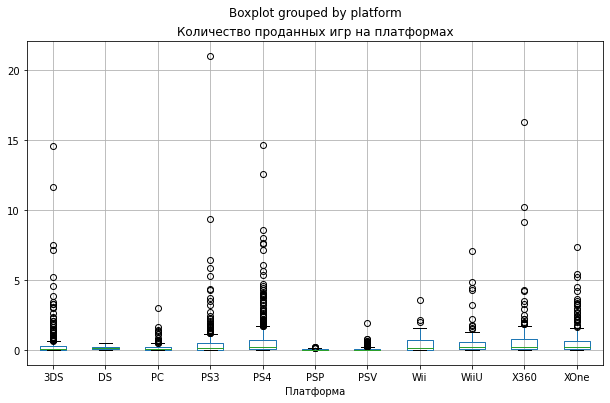

In [29]:
# построим boxplot по глобальным продажам игр в разбивке по платформам 
actual_table.boxplot(column='total_sale', by='platform', figsize=(10, 6))
plt.title('Количество проданных игр на платформах')
plt.xlabel('Платформа')
plt.show()

Платформы, которые мы выявили, как самые прибыльные на предыдущем графике, на данном рисунке показывают очень большой отрыв от среднего значения прибыли, эти платформы принесли аномально большую прибыль владельцам за счет единичных игр, которые оказывались наиболее популярными с сильным отрывом от средних по доходности игр - `DS`, `PS2`, `PS3`, `Wii`, `X360`.

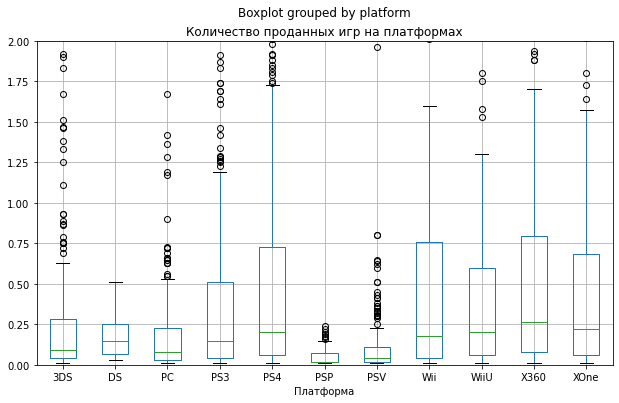

In [30]:
# построим boxplot по глобальным продажам игр в разбивке по платформам с ограничением по выбросам
actual_table.boxplot(column='total_sale', by='platform', figsize=(10, 6))
plt.ylim (0,2)
plt.title('Количество проданных игр на платформах')
plt.xlabel('Платформа')
plt.show()

Исходя из графика, наиболее популярные платформы по медианным продажам - `X360`, `XOne`, `PS4`, `WiiU`, `Wii`, на которых в среднем продается 250000 копий игр. 
Такие платформы, как `PC`, `PSP`, `PSV` отстают по продажам от остальных. 
Платформы `PS3`, `X360`, `3DS`, `PS4` лидируют по количеству топовых игр с высокими продажами.

### Влияние отзывов на продажи внутри популярной платформы

Для анализа возьмем одну из самых популярных платфом за актуальное время - `X360`

'Корреляция между оценкой пользователей и продажами'

-0.006238179532306289

'Корреляция между оценкой критиков и продажами'

0.35034454602286647

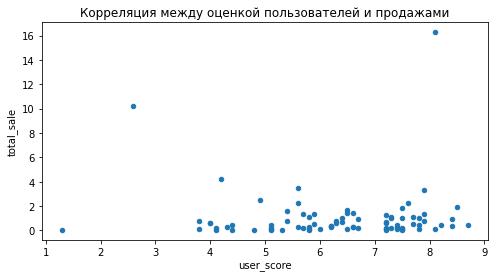

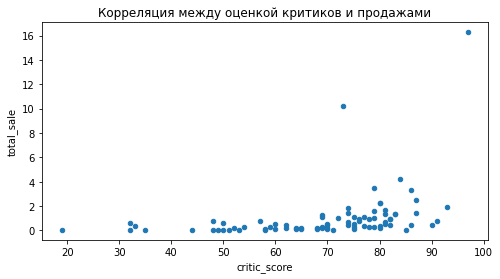

In [31]:
# отфильтруем данные для одной платформы
X360 = actual_table[actual_table['platform'] == 'X360']
X360 = X360[X360['user_score'] > 0]
X360 = X360[X360['critic_score'] > 0]

# построим диаграммы рассеяния
X360.plot(x='user_score', y='total_sale', kind='scatter', figsize=(8, 4),
        title = 'Корреляция между оценкой пользователей и продажами')
X360.plot(x='critic_score', y='total_sale', kind='scatter', figsize=(8, 4),
       title = 'Корреляция между оценкой критиков и продажами')

# коэффициент корреляции пирсона
display('Корреляция между оценкой пользователей и продажами', X360['user_score'].corr(X360['total_sale']))
display('Корреляция между оценкой критиков и продажами', X360['critic_score'].corr(X360['total_sale']))

Корреляция между продажами и отзывами критиков есть, но она небольшая, между оценкой пользователей и продажами корреляция отсутствует. Сравним результаты с другими популярными платформами.

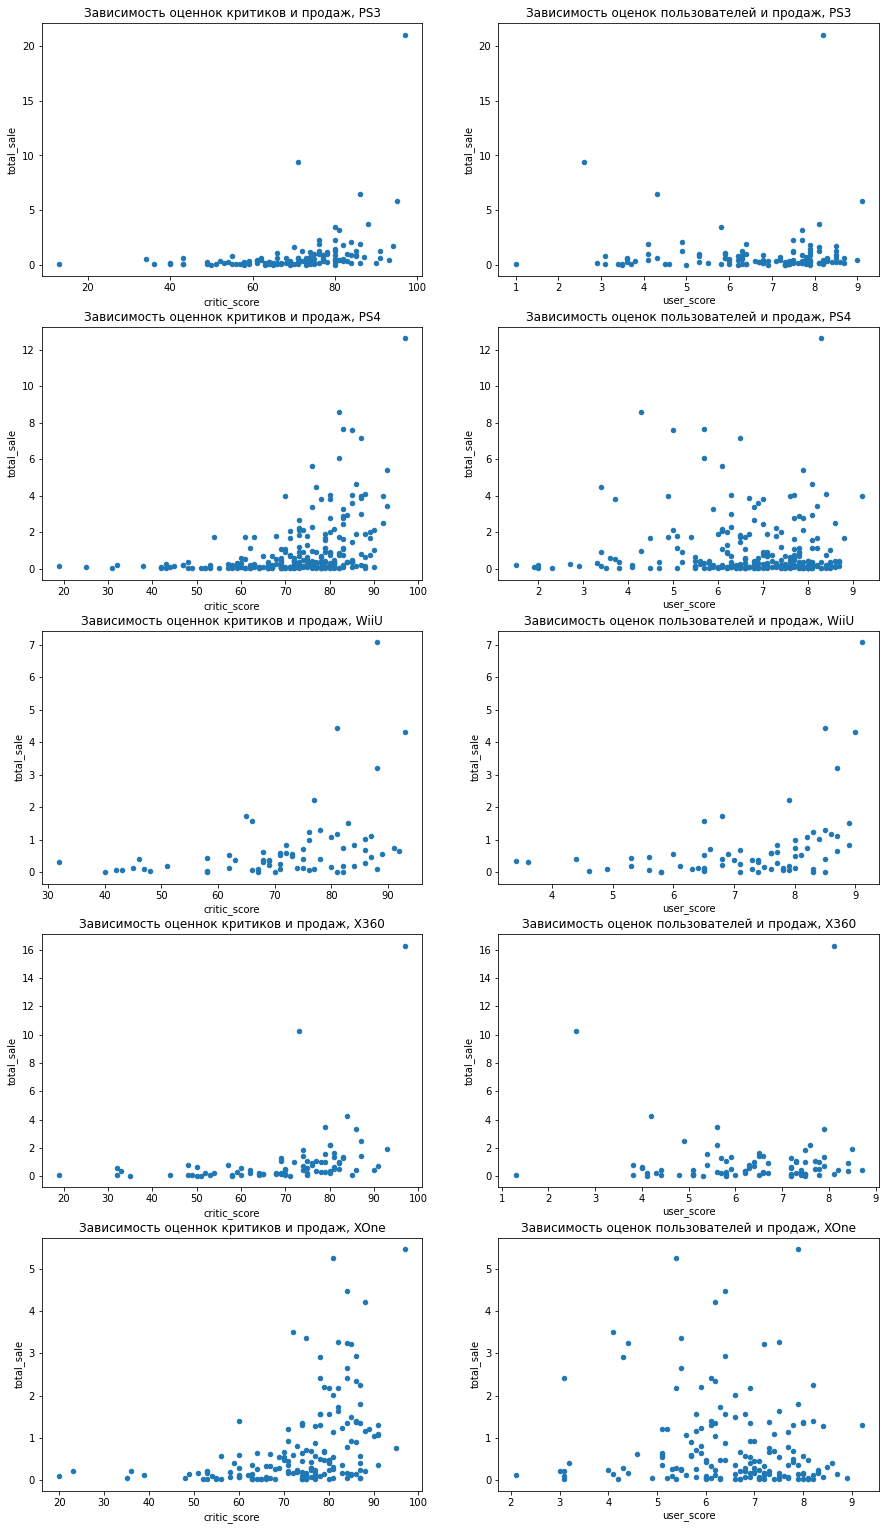

In [32]:
import matplotlib.pyplot as plt

#создадим таблицы с популярными платформами
popular_platforms_list = ['PS4', 'XOne', 'WiiU','X360', 'PS3']
popular_platforms = actual_table[actual_table['platform'].isin(popular_platforms_list)]
popular_platforms = popular_platforms[popular_platforms['critic_score'] > 0]
popular_platforms = popular_platforms[popular_platforms['user_score'] > 0]

# построим две диаграммы рядом
fig, axs = plt.subplots(5, 2, figsize=(15, 27))

# создандим массив с данными
index = []

# создадим цикл для построения графиков рассеяния
for platform, games in popular_platforms.groupby('platform'):
    index.append(platform)
    games.plot(kind='scatter', x='critic_score', y='total_sale',
               title = 'Зависимость оценнок критиков и продаж, {}'.format(platform), 
               alpha=1, ax=axs[len(index)-1, 0])
    
    games.plot(kind='scatter', x='user_score', y='total_sale',
              title = 'Зависимость оценок пользователей и продаж, {}'.format(platform),
               alpha=1,  ax=axs[len(index)-1, 1])

In [33]:
# корреляция между оценкой и продажами
display (popular_platforms.groupby('platform')['critic_score'].corr(popular_platforms['total_sale']).mean())
display (popular_platforms.groupby('platform')['user_score'].corr(popular_platforms['total_sale']).mean())

0.37599450354853114

0.05950326967071706

Продажи игр на 37% коррелируют с оценками критиков и практически не зависят от оценкок пользователей. На графиках можно проследить следующее: игры с высоким рейтингом от критиков чаще продаются значительно лучше остальных игр, что показывает, что оценка игры критиками непосредственно влияет на ее дальнейшие продажи, а оценка пользователей нет.

### Распределение жанров и продаж игр

In [34]:
# таблица по жанрам с общими продажами и количеством игр
platform_sale = actual_table.groupby('genre')[['total_sale']].sum().join(
    actual_table.groupby('genre')[['name']].count())
    
# названия столбцов и сортировка
platform_sale.columns = ['total_sale', 'number_of_games']
platform_sale.sort_values('total_sale', ascending=False, inplace=True)
    
# trace для отображения продаж и количества игр на одном графике
trace0 = go.Bar(
    x=platform_sale.index,
    y=platform_sale.total_sale,
    name='Всего продаж в мире'
)
trace1 = go.Bar(
    x=platform_sale.index,
    y=platform_sale.number_of_games,
    name='Количество выпущенных игр'
)

# массив с данными и общий заголовок диаграмм
data = [trace0, trace1]
layout = {'title': 'Доля по жанрам', 'xaxis': {'title': 'genre'}}
    
# объект Figure и его визуализизация
fig = go.Figure(data=data)
iplot(fig, show_link=False)


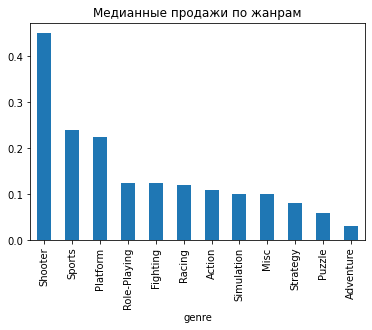

In [36]:
actual_table.groupby('genre')['total_sale'].median().sort_values(ascending = False)\
    .plot(kind = 'bar', title = 'Медианные продажи по жанрам')
plt.show()

Наиболее успешные по продажам жанры - это Shooter, Sports, Platform. У этих жанров самые высокие показатели средних продаж и они стабильно приносят высокий доход. Однако у жанра Action больше всего топовых игр, которые имеют наибольшее количество продаж, но в среднем количество продаж низкое.

# 4. Портрет пользователя по регионам 

#### Самые популярные платформы (топ-5)

In [37]:
import matplotlib.pyplot as plt

# список с регионами и названими
regions = ['na', 'eu', 'jp']
names = ['Северная Америка', 'Европа', 'Япония']

# массив с данными
data = []

# функция для построения диграммы
for i in range(3):
    
    platforms = (actual_table.groupby('platform')[regions[i]].sum().reset_index()
              .sort_values(regions[i], ascending=False, ignore_index=True)).head()
    
    trace = go.Bar(x=platforms.platform, y=platforms[regions[i]], name=names[i])
    
    data.append(trace)

# общий заголовок диаграмм
layout = {'title': 'Продажи на платформах', 'xaxis': {'title': 'platform'}}

# объект Figure и его визуализизация
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Значительная доля продаж на платформах приходится на Северную Америку.
* Лидирующие платформы в Северной Америке - `PS4`, `XOne`, `X360`, `PS3`, `3DS`
* Самые популярные платформы в Европе -  `PS4`, `PS3`, `XOne`, `X360`, `3DS`
* В Европе и Америке лидирут одинаковые платформы
* В Японии лидируют другие платформы - `3DS`, `PS3`, `PS4`, `PSV`, `WiiU`

#### Самые популярные жанры (топ-5)

Text(0.5, 0.98, 'Распределение продаж по жанрам')

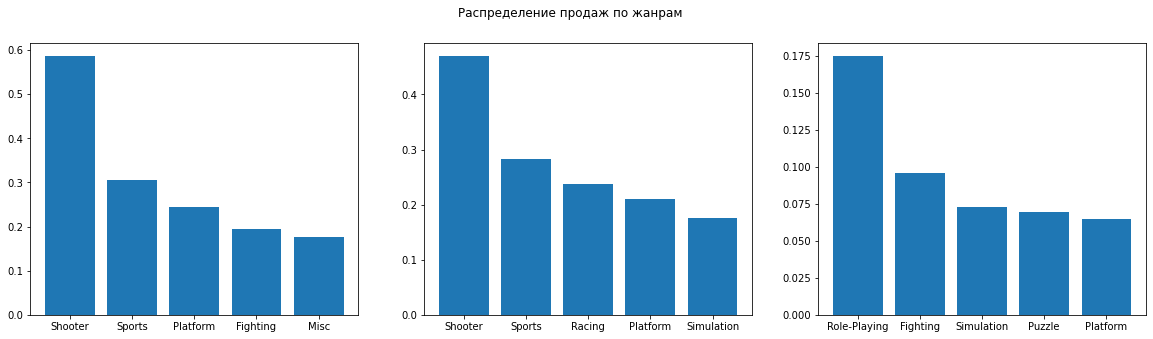

In [38]:
# список с регионами
regions = ['na', 'eu', 'jp']

# построение трех диаграмм рядом
figure, ax = plt.subplots(1, 3, figsize=(20, 5))

# функция для построения диграмм
for i in range(3):
    rating = (actual_table.groupby('genre')[regions[i]].mean().reset_index()
              .sort_values(regions[i], ascending=False, ignore_index=True)
             ).head()
    ax[i].bar(rating['genre'], rating[regions[i]])
    
# общий заголовок диаграмм
plt.suptitle('Распределение продаж по жанрам')

* В Европе и Северной Америке популярные жанры - Shooter, Sports, Platform
* В Америке также играют в Fighting и Misc, а в Европе в Racing, Simulation.
* В Японии самым популярным жанром является Role-Playing, Fighting, Simulation.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Text(0.5, 0.98, 'Распределение продаж по рейтинку ESRB')

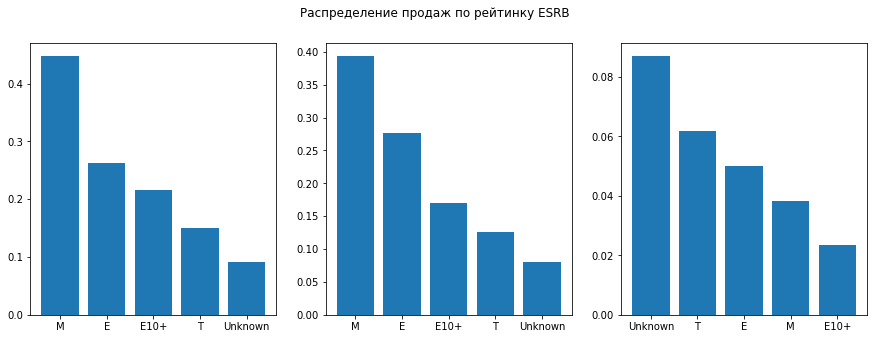

In [39]:
# создадим список с регионами
regions = ['na', 'eu', 'jp']

# построение трех диаграмм рядом
figure, ax = plt.subplots(1, 3, figsize=(15, 5))

# функция для построения диграмм
for i in range(3):
    rating = (actual_table.groupby('rating')[regions[i]].mean().reset_index()
              .sort_values(regions[i], ascending=False, ignore_index=True)
             )
    ax[i].bar(rating['rating'], rating[regions[i]])

# общий заголовок диаграмм
plt.suptitle('Распределение продаж по рейтинку ESRB')

В среднем, продажи в каждом регионе распределяются одинаково относительно рейтинга ESRB. Рейтинг `E` - самый популярный, далее рейтинг - `M` и `T`, однако в Японии рейтинг `T` - на втором месте, в отличии от Америки и Европы, где он находится на 3-м месте после `M` по продажам

# 5. Проверка гипотез

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [40]:
actual_table['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

* Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные

In [41]:
from scipy import stats as st

# отфильтруем данные и создадим Series с рейтингами
xbox_score = actual_table[actual_table['platform'] == 'XOne']['user_score']
pc_score = actual_table[actual_table['platform'] == 'PC']['user_score']

# исключим аномальные значения, являющиеся пропусками
xbox_score = xbox_score.loc[xbox_score != -3]
pc_score = pc_score.loc[pc_score != -3]

print ('Средний пользовательский рейтинг XOne', xbox_score.mean())
print ('Средний пользовательский рейтинг PC', pc_score.mean())

# критический уровень статистической значимости
alpha = 0.05

# проверка гипотезы о равенстве средних
results = st.ttest_ind(xbox_score, pc_score)

print('p-значение:', results.pvalue)

#сравнение p-значения с заданным уровнем статистической значимости
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг XOne 6.52142857142857
Средний пользовательский рейтинг PC 6.269677419354836
p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

In [42]:
actual_table['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

* Нулевая гипотеза - средние пользовательские рейтинги жанров экшн и спорт одинаковые
* Альтернативная гипотеза - средние пользовательские рейтинги платформ экшн и спорт разные

In [43]:
# отфильтруем данные и создадим Series с рейтингами
action_score = actual_table[actual_table['genre'] == 'Action']['user_score']
sports_score = actual_table[actual_table['genre'] == 'Sports']['user_score']

# исключим аномальные значения, являющиеся пропусками
action_score = action_score.loc[action_score != -3]
sports_score = sports_score.loc[sports_score != -3]

print ('Средний пользовательский рейтинг Action', action_score.mean())
print ('Средний пользовательский рейтинг Sports', sports_score.mean())

# критический уровень статистической значимости
alpha = 0.05

# проверка гипотезы о равенстве средних
results = st.ttest_ind(action_score, sports_score)

print('p-значение:', results.pvalue)

#сравнение p-значения с заданным уровнем статистической значимости
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг Action 6.837532133676097
Средний пользовательский рейтинг Sports 5.238124999999999
p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ экшн и спорт разные

# 6. Вывод

1. До 2002 года игр выпускалось значительно меньше, а средняя продолжительность жизни популярной платформы - 10 лет, около 5 новых платформ появились с 2004 по 2006 год и столько же платформ исчезло, актуальный период для прогноза на 2017 год - 2013 - 2016.

2. Следует обратить внимание на такие платформы, как `X360`, `XOne`, `PS4`, `WiiU`, `Wii`, на которых в среднем продается 250000 копий игр. Такие платформы, как `PC`, `PSP`, `PSV` отстают по продажам от остальных.  Платформы `PS3`, `X360`, `3DS`, `PS4` лидируют по количеству топовых игр с высокими продажами.

3. Игры с высоким рейтингом от критиков чаще продаются значительно лучше остальных игр, что показывает, что оценка игры критиками непосредственно влияет на ее дальнейшие продажи, а оценка пользователей нет.

4. Отделу маркетинга стоит обратить внимание на следующие жанры: Shooter, Sports, Platform. У этих жанров самые высокие показатели средних продаж и они стабильно приносят высокий доход. Однако у жанра Action больше всего топовых игр, которые имеют наибольшее количество продаж, но в среднем продажи низкие.

5. Портрет пользователя из Северной Америки:
* Платформа - `PS4`, `XOne`, `X360`, `PS3`, `3DS`
* Жанры - Shooter, Sports, Platform, Fighting и Misc
* Рейтинг `E` - самый популярный, далее рейтинг - `M` и `T`

6. Портрет пользователя из Европы:
* Платформы -  `PS4`, `PS3`, `XOne`, `X360`, `3DS`
* Жанры - Shooter, Sports, Platform, Racing, Simulation
* Рейтинг `E` - самый популярный, далее рейтинг - `M` и `T`

7. Портрет пользователя из Японии
* Платформы - `3DS`, `PS3`, `PS4`, `PSV`, `WiiU`
* Жанры - Role-Playing, Fighting, Simulation
* Рейтинг `E`, `T`, `M`

8. Средние пользовательские рейтинги Xbox One и PC разные. Средние пользовательские рейтинги платформ экшн и спорт разные.